# Customer Purchase Behavior Analysis using Descriptive Statistics

##Problem Statement

Your mission is to analyze the provided dataset containing customer information and purchasing behavior to make informed decisions. Your goal is to identify patterns, trends, and correlations that will help your company optimize its marketing efforts and increase offer acceptance rates.

##About the Dataset



Here's the link to the [dataset](https://docs.google.com/spreadsheets/d/12ln9iTNcVNOMYi_AU-OczKpa_KIP8XyVbsjk81Na8Yk/edit?usp=sharing)


This data was gathered during last year's campaign.
Data description is as follows;

1. Response (target) - 1 if customer accepted the offer in the last campaign, 0 otherwise
1. ID - Unique ID of each customer
1. Year_Birth - Age of the customer
1. Complain - 1 if the customer complained in the last 2 years
1. Dt_Customer - date of customer's enrollment with the company
1. Education - customer's level of education
1. Marital - customer's marital status
1. Kidhome - number of small children in customer's household
1. Teenhome - number of teenagers in customer's household
1. Income - customer's yearly household income
1. MntFishProducts - the amount spent on fish products in the last 2 years
1. MntMeatProducts - the amount spent on meat products in the last 2 years
1. MntFruits - the amount spent on fruits products in the last 2 years
1. MntSweetProducts - amount spent on sweet products in the last 2 years
1. MntWines - the amount spent on wine products in the last 2 years
1. MntGoldProds - the amount spent on gold products in the last 2 years
1. NumDealsPurchases - number of purchases made with discount
1. NumCatalogPurchases - number of purchases made using catalog (buying goods to be shipped through the mail)
1. NumStorePurchases - number of purchases made directly in stores
1. NumWebPurchases - number of purchases made through the company's website
1. NumWebVisitsMonth - number of visits to company's website in the last month
1. Recency - number of days since the last purchase





##Task 1 - **Basic CleanUp**

In [1]:
# Importing required libraries:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [2]:
df = pd.read_csv('https://docs.google.com/spreadsheets/d/12ln9iTNcVNOMYi_AU-OczKpa_KIP8XyVbsjk81Na8Yk/export?format=csv&gid=0')
df.head()

,Id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
0,1826,1970,Graduation,Divorced,84835.0,0,0,6/16/2014,0,189,...,111,189,218,1,4,4,6,1,1,0
1,1,1961,Graduation,Single,57091.0,0,0,6/15/2014,0,464,...,7,0,37,1,7,3,7,5,1,0
2,10476,1958,Graduation,Married,67267.0,0,1,5/13/2014,0,134,...,15,2,30,1,3,2,5,2,0,0
3,1386,1967,Graduation,Together,32474.0,1,1,########,0,10,...,0,0,0,1,1,0,2,7,0,0
4,5371,1989,Graduation,Single,21474.0,1,0,########,0,6,...,11,0,34,2,3,1,2,7,1,0


In [3]:
# Step 1: Find the error in Dt_Customer column
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], errors='coerce')

# Step 2: Replace '########' with NaN using a non-chained approach
df.loc[df['Dt_Customer'] == '########', 'Dt_Customer'] = pd.NA

# Step 3: Confirm initial changes
print(df['Dt_Customer'].isnull().sum())  # Should show 916 NaN values

# Step 4: Fill NaN values with the mean date ignoring time component
mean_date = df['Dt_Customer'].mean().normalize()  # Normalize to remove time

# Step 5: Fill NaN values
df['Dt_Customer'] = df['Dt_Customer'].fillna(mean_date)

# Step 6: Confirm final changes
print(df['Dt_Customer'].isnull().sum())  # Should be 0 NaN values

916
0


In [4]:
# Fill NaN values in the 'Income' column with the mean of the existing values
income_mean = df['Income'].mean()
df['Income'] = df['Income'].fillna(income_mean)

# Confirm changes
print(df['Income'].isnull().sum())  # Should be 0 NaN values

0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Id                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2240 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

In [6]:
# Summary statistics for numerical columns
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Calculate stats
stats_summary = pd.DataFrame({
    'Mean': df[numerical_columns].mean(),
    'Median': df[numerical_columns].median(),
    'Variance': df[numerical_columns].var(),
    'Standard Deviation': df[numerical_columns].std()
})

# Display the summary
print(stats_summary)

                             Mean   Median      Variance  Standard Deviation
Id                    5592.159821   5458.5  1.054082e+07         3246.662198
Year_Birth            1968.805804   1970.0  1.436179e+02           11.984069
Income               52247.251354  51741.5  6.268913e+08        25037.797168
Kidhome                  0.444196      0.0  2.898725e-01            0.538398
Teenhome                 0.506250      0.0  2.965219e-01            0.544538
Recency                 49.109375     49.0  8.388237e+02           28.962453
MntWines               303.935714    173.5  1.132978e+05          336.597393
MntFruits               26.302232      8.0  1.581926e+03           39.773434
MntMeatProducts        166.950000     67.0  5.094743e+04          225.715373
MntFishProducts         37.525446     12.0  2.984325e+03           54.628979
MntSweetProducts        27.062946      8.0  1.704080e+03           41.280498
MntGoldProds            44.021875     24.0  2.721442e+03           52.167439

###1. Analyze Age Distribution

count    2240.000000
mean       56.194196
std        11.984069
min        29.000000
25%        48.000000
50%        55.000000
75%        66.000000
max       132.000000
Name: Age, dtype: float64


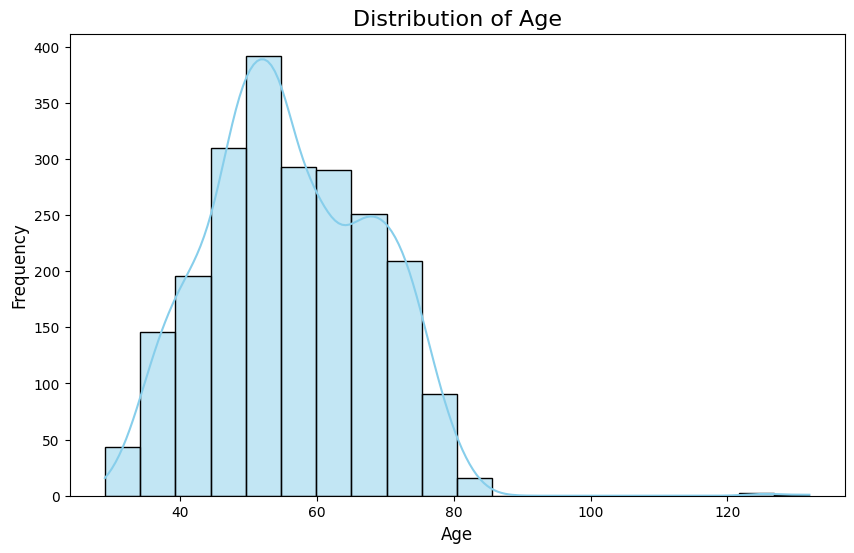

In [7]:
# Calculate Age
df['Age'] = 2025 - df['Year_Birth']  # Replace 2025 with the current year if necessary

# Descriptive statistics for Age
print(df['Age'].describe())

# Visualization for Age
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Age', fontsize=16)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

###2. Analyze Education Distribution

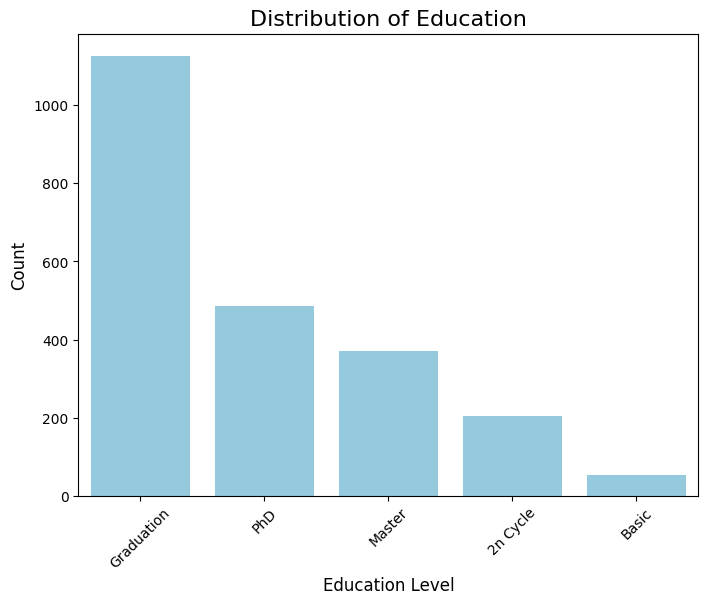

In [8]:
# Visualization for Education
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Education', color='skyblue', order=df['Education'].value_counts().index)
plt.title('Distribution of Education', fontsize=16)
plt.xlabel('Education Level', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
plt.show()

###3. Analyze Marital Status Distribution

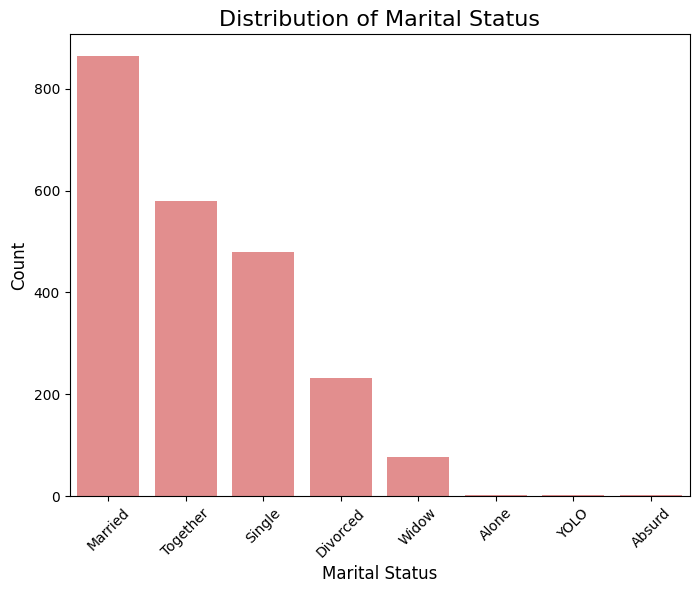

In [9]:
# Visualization for Marital Status
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Marital_Status', color='lightcoral', order=df['Marital_Status'].value_counts().index)
plt.title('Distribution of Marital Status', fontsize=16)
plt.xlabel('Marital Status', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
plt.show()

###4. Combined Analysis of Age, Education, and Marital Status

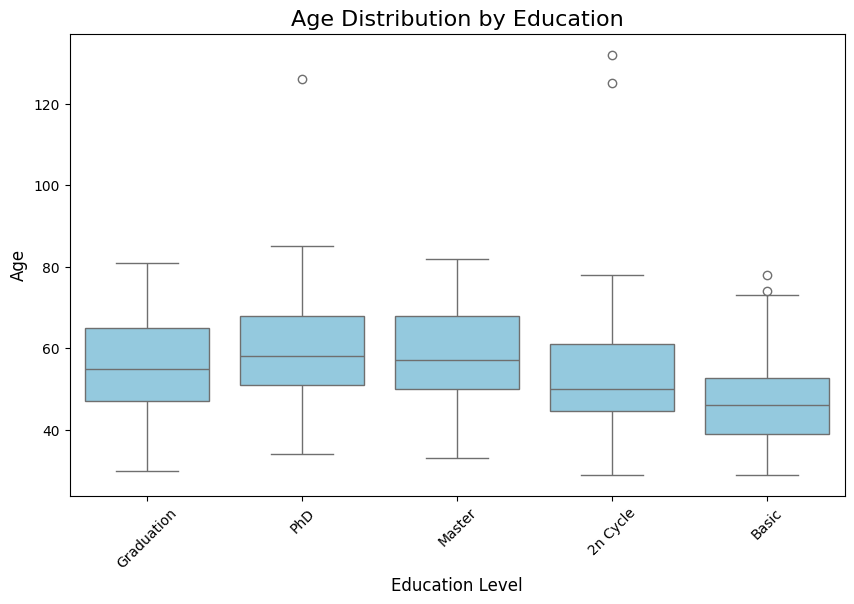

In [10]:
# Visualization of Age Distribution by Education
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Education', y='Age', color='skyblue', order=df['Education'].value_counts().index)
plt.title('Age Distribution by Education', fontsize=16)
plt.xlabel('Education Level', fontsize=12)
plt.ylabel('Age', fontsize=12)
plt.xticks(rotation=45)
plt.show()

### Cleaned and Preprocessed Dataset
#### Missing Values and Data Type Handling:
1. **`Dt_Customer` Column:**
   - Converted the column to `datetime64[ns]` data type while replacing invalid entries (`########`) with `NaT`.
   - Imputed missing values (916 `NaT`) with the mean date of other entries (`2013-06-16`).

2. **`Income` Column:**
   - Filled 24 missing values with the mean income (`52,247.25`).

#### Data Type Consistency:
All columns were checked and aligned with appropriate data types:
- Numerical columns (`int64`, `float64`) and categorical columns (`object`) were verified.
- `Dt_Customer` successfully retained as `datetime64[ns]`.

---

### Summary of Basic Statistics

| Column Name           | Mean       | Median  | Variance        | Standard Deviation |
|-----------------------|------------|---------|-----------------|--------------------|
| **Id**                | 5592.16    | 5458.5  | 10,540,820.00   | 3246.66            |
| **Year_Birth**        | 1968.81    | 1970.0  | 143.62          | 11.98              |
| **Income**            | 52247.25   | 51741.5 | 626,891,300.00  | 25037.80           |
| **Kidhome**           | 0.44       | 0.0     | 0.29            | 0.54               |
| **Teenhome**          | 0.51       | 0.0     | 0.30            | 0.54               |
| **Recency**           | 49.11      | 49.0    | 838.82          | 28.96              |
| **MntWines**          | 303.94     | 173.5   | 113,297.80      | 336.60             |
| **MntFruits**         | 26.30      | 8.0     | 1581.93         | 39.77              |
| **MntMeatProducts**   | 166.95     | 67.0    | 50,947.43       | 225.72             |
| **MntFishProducts**   | 37.53      | 12.0    | 2984.33         | 54.63              |
| **MntSweetProducts**  | 27.06      | 8.0     | 1704.08         | 41.28              |
| **MntGoldProds**      | 44.02      | 24.0    | 2721.44         | 52.17              |
| **NumDealsPurchases** | 2.33       | 2.0     | 3.73            | 1.93               |
| **NumWebPurchases**   | 4.08       | 4.0     | 7.72            | 2.78               |
| **NumCatalogPurchases** | 2.66     | 2.0     | 8.54            | 2.92               |
| **NumStorePurchases** | 5.79       | 5.0     | 10.57           | 3.25               |
| **NumWebVisitsMonth** | 5.32       | 6.0     | 5.89            | 2.43               |
| **Response**          | 0.15       | 0.0     | 0.13            | 0.36               |
| **Complain**          | 0.01       | 0.0     | 0.01            | 0.10               |
| **Age**               | 56.19      | 55.0    | 143.62          | 11.98              |

---

This concludes the **Cleaned and Preprocessed Dataset** along with the **Summary of Basic Statistics** for Part 1 of the project.


##Task 2 - **Descriptive Statistics**



In [11]:
# Step 1: Filter only numeric columns
numeric_df = df.select_dtypes(include=[np.number])

# Step 2: Calculate Central Tendency Measures
mean_values = numeric_df.mean()
median_values = numeric_df.median()
mode_values = numeric_df.mode().iloc[0]  # Most frequent values
print("Central Tendency Measures:")
print("Mean:\n", mean_values)
print("Median:\n", median_values)
print("Mode:\n", mode_values)

# Step 3: Calculate Dispersion Measures
variance_values = numeric_df.var()
std_dev_values = numeric_df.std()
print("\nDispersion Measures:")
print("Variance:\n", variance_values)
print("Standard Deviation:\n", std_dev_values)

# Step 4: Handle Outliers
# Identifying outliers using IQR method
Q1 = numeric_df.quantile(0.25)
Q3 = numeric_df.quantile(0.75)
IQR = Q3 - Q1

# Filtering out outliers
df_no_outliers = numeric_df[~((numeric_df < (Q1 - 1.5 * IQR)) | (numeric_df > (Q3 + 1.5 * IQR))).any(axis=1)]

# Display cleaned dataset without outliers
print("\nData without Outliers:\n", df_no_outliers)

Central Tendency Measures:
Mean:
 Id                      5592.159821
Year_Birth              1968.805804
Income                 52247.251354
Kidhome                    0.444196
Teenhome                   0.506250
Recency                   49.109375
MntWines                 303.935714
MntFruits                 26.302232
MntMeatProducts          166.950000
MntFishProducts           37.525446
MntSweetProducts          27.062946
MntGoldProds              44.021875
NumDealsPurchases          2.325000
NumWebPurchases            4.084821
NumCatalogPurchases        2.662054
NumStorePurchases          5.790179
NumWebVisitsMonth          5.316518
Response                   0.149107
Complain                   0.009375
Age                       56.194196
dtype: float64
Median:
 Id                      5458.5
Year_Birth              1970.0
Income                 51741.5
Kidhome                    0.0
Teenhome                   0.0
Recency                   49.0
MntWines                 173.5
MntFr

## Task 3 - **Probability Distributions**



In [12]:
# Step 1: Identify Variables for Distribution
# For example, we choose 'Income' for a Normal distribution, and 'NumDealsPurchases' for a Binomial distribution.

# Normal Distribution
income_data = df['Income']
normal_params = stats.norm.fit(income_data)

# Binomial Distribution (Alternative Approach)
deals_data = df['NumDealsPurchases']
binomial_params = (deals_data.max(), deals_data.mean()/deals_data.max())  # Using max and mean ratio as a proxy for n and p

# Step 2: Probability Calculations
# For Normal Distribution
normal_dist = stats.norm(*normal_params)
mean, std_dev = normal_dist.mean(), normal_dist.std()
print(f"Normal Distribution: Mean = {mean}, Std Dev = {std_dev}")

# Calculate probabilities
prob_less_than = normal_dist.cdf(60000)  # P(X < 60000)
prob_greater_than = 1 - normal_dist.cdf(40000)  # P(X > 40000)

print(f"P(Income < 60000): {prob_less_than}")
print(f"P(Income > 40000): {prob_greater_than}")

# For Binomial Distribution
n, p = binomial_params
binomial_dist = stats.binom(n, p)

# Calculate probabilities for specific outcomes
prob_exact = binomial_dist.pmf(3)  # P(X = 3)
prob_at_least = binomial_dist.sf(2)  # P(X >= 2)

print(f"P(NumDealsPurchases = 3): {prob_exact}")
print(f"P(NumDealsPurchases >= 2): {prob_at_least}")

# Step 3: Expected Values
# Normal Distribution Expected Value
expected_income = normal_dist.expect()
print(f"Expected Income: {expected_income}")

# Binomial Distribution Expected Value
expected_deals = binomial_dist.mean()
print(f"Expected Number of Deals Purchases: {expected_deals}")

# Step 4: Handle Outliers
# Assuming we handle outliers using z-score or other methods
z_scores_income = (income_data - mean) / std_dev
outliers_income = np.where(np.abs(z_scores_income) > 3)  # For a z-score threshold of 3
print(f"Outliers in Income: {outliers_income}")

# Step 5: Analyze Distribution Properties
# Skewness and Kurtosis
skewness_income = stats.skew(income_data)
kurtosis_income = stats.kurtosis(income_data)

print(f"Income Skewness: {skewness_income}")
print(f"Income Kurtosis: {kurtosis_income}")

Normal Distribution: Mean = 52247.25135379061, Std Dev = 25032.207750492915
P(Income < 60000): 0.621609609482087
P(Income > 40000): 0.6876710885138919
P(NumDealsPurchases = 3): 0.22453652576756006
P(NumDealsPurchases >= 2): 0.4175655798327718
Expected Income: 52247.251353790605
Expected Number of Deals Purchases: 2.325
Outliers in Income: (array([ 325,  497,  527,  731,  853, 1826, 1925, 2204]),)
Income Skewness: 6.795410359504242
Income Kurtosis: 161.03151005786188


## Task 4: Insights and Customer Segmentation

- **Explore relationships between customer characteristics and spending habits. Segment customers based on their behaviors and characteristics.**

Correlation Matrix:
                           Id  Year_Birth    Income   Kidhome  Teenhome  \
Id                   1.000000    0.000028  0.013036  0.002406 -0.002580   
Year_Birth           0.000028    1.000000 -0.160942  0.230176 -0.352111   
Income               0.013036   -0.160942  1.000000 -0.425176  0.019018   
Kidhome              0.002406    0.230176 -0.425176  1.000000 -0.036133   
Teenhome            -0.002580   -0.352111  0.019018 -0.036133  1.000000   
Recency             -0.046524   -0.019871 -0.003946  0.008827  0.016198   
MntWines            -0.022878   -0.157773  0.576789 -0.496297  0.004846   
MntFruits            0.004600   -0.017917  0.428747 -0.372581 -0.176764   
MntMeatProducts     -0.004437   -0.030872  0.577802 -0.437129 -0.261160   
MntFishProducts     -0.024475   -0.041625  0.437497 -0.387644 -0.204187   
MntSweetProducts    -0.007642   -0.018133  0.436162 -0.370673 -0.162475   
MntGoldProds        -0.013438   -0.061818  0.321978 -0.349595 -0.021725   
NumDe

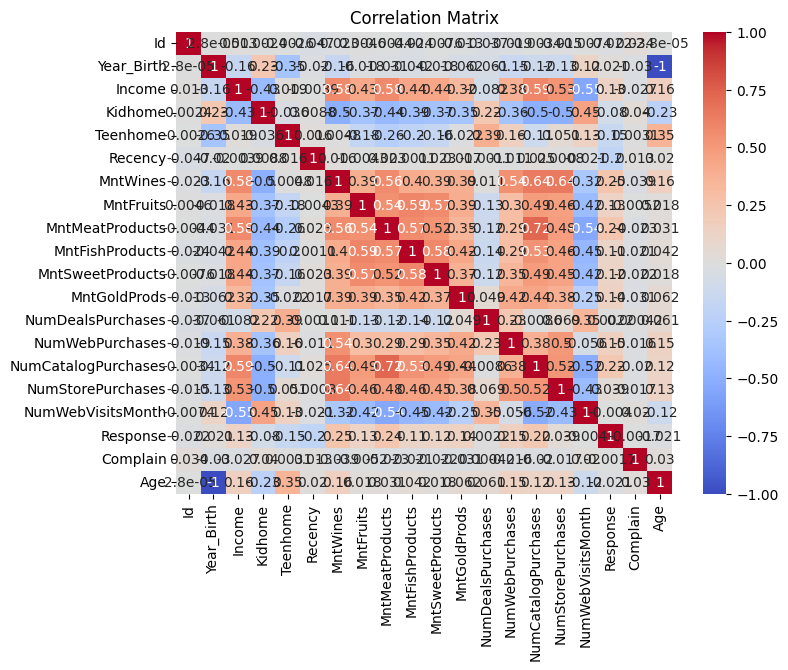


High Spending Customers:
Id                      5660.25
Year_Birth              1967.89
Income                 80450.57
Kidhome                    0.08
Teenhome                   0.28
Recency                   48.79
MntWines                 635.56
MntFruits                 60.61
MntMeatProducts          435.45
MntFishProducts           88.37
MntSweetProducts          65.03
MntGoldProds              72.19
NumDealsPurchases          1.42
NumWebPurchases            5.31
NumCatalogPurchases        5.71
NumStorePurchases          8.35
NumWebVisitsMonth          2.93
Response                   0.27
Complain                   0.00
Age                       57.11
High_Spending              1.00
Low_Spending               0.00
High_Deals                 0.11
Low_Deals                  0.89
dtype: float64

Low Spending Customers:
Id                      5669.69
Year_Birth              1973.96
Income                 25296.58
Kidhome                    0.79
Teenhome                   0.25
Recenc

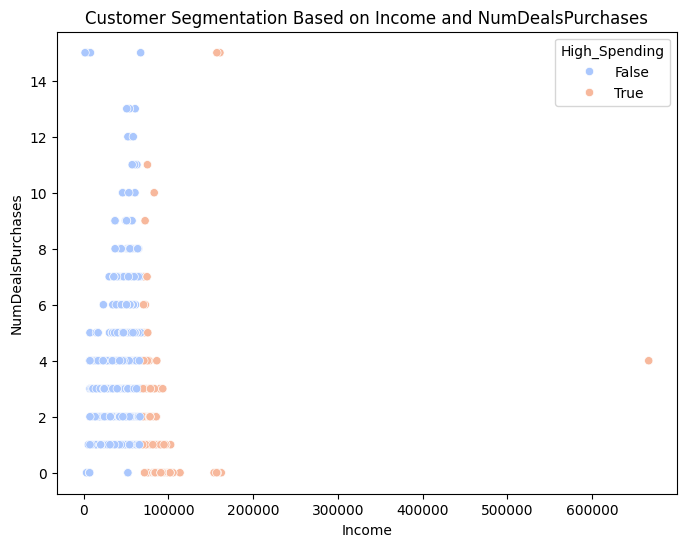

In [13]:
# Step 1: Filter numeric columns only
numeric_df = df.select_dtypes(include=[np.number])

# Step 2: Calculate Correlation Matrix
correlation_matrix = numeric_df.corr()
print("Correlation Matrix:")
print(correlation_matrix)

# Step 3: Visualizing Relationships
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Step 4: Segmentation Based on Customer Behaviors

# Segmenting customers based on spending habits
income_quantile_75 = numeric_df['Income'].quantile(0.75)
income_quantile_25 = numeric_df['Income'].quantile(0.25)

numeric_df['High_Spending'] = numeric_df['Income'] > income_quantile_75
numeric_df['Low_Spending'] = numeric_df['Income'] <= income_quantile_25

# Segmenting customers based on number of deals
deals_mean = numeric_df['NumDealsPurchases'].mean()

numeric_df['High_Deals'] = numeric_df['NumDealsPurchases'] > deals_mean
numeric_df['Low_Deals'] = numeric_df['NumDealsPurchases'] <= deals_mean

# Step 5: Insights - Summary of Segments
print("\nHigh Spending Customers:")
print(numeric_df[numeric_df['High_Spending']].mean().round(2))

print("\nLow Spending Customers:")
print(numeric_df[numeric_df['Low_Spending']].mean().round(2))

print("\nHigh Deals Customers:")
print(numeric_df[numeric_df['High_Deals']].mean().round(2))

print("\nLow Deals Customers:")
print(numeric_df[numeric_df['Low_Deals']].mean().round(2))

# Step 6: Visualizing Segments
plt.figure(figsize=(8, 6))
sns.scatterplot(data=numeric_df, x='Income', y='NumDealsPurchases', hue='High_Spending', palette='coolwarm')
plt.title('Customer Segmentation Based on Income and NumDealsPurchases')
plt.show()

## Task 5: **Conclusion and Recommendations**


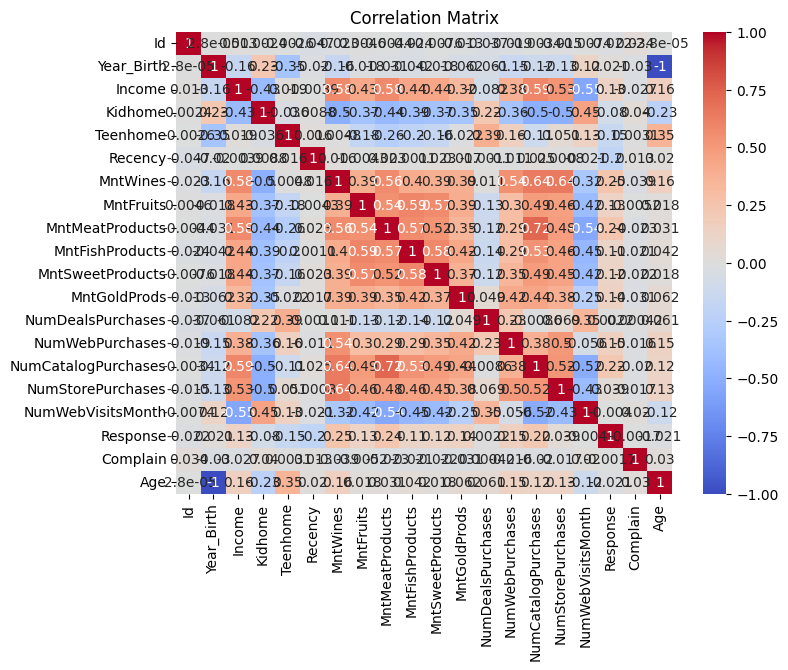

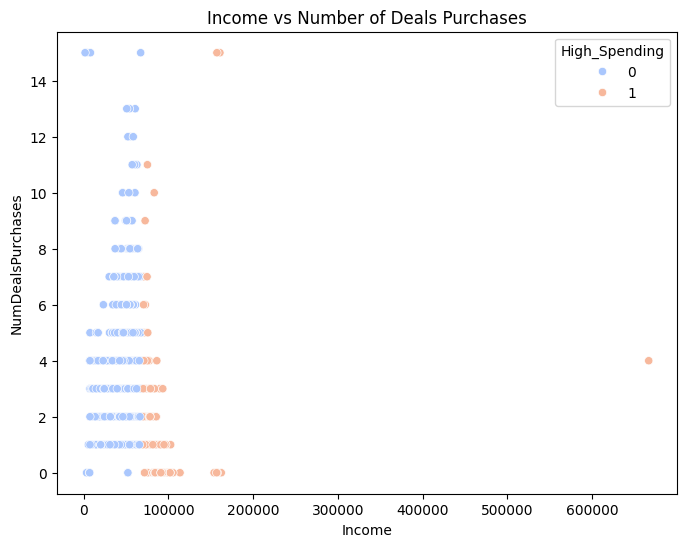

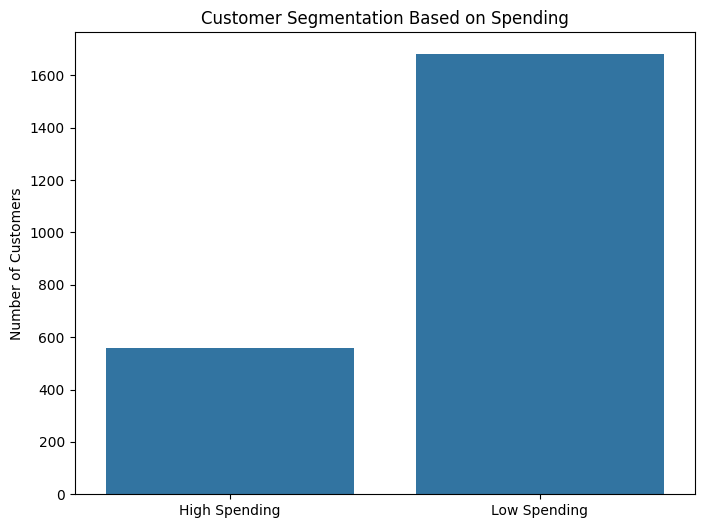

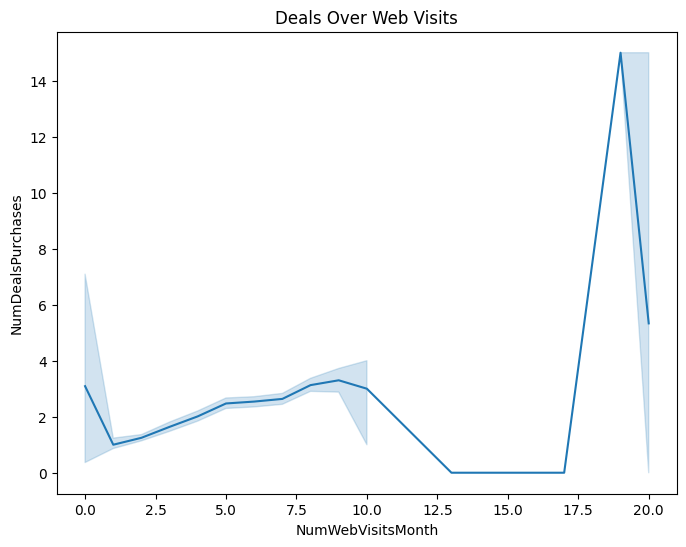

In [14]:
# Step 1: Add a new column to categorize customers based on income
# Threshold at 75th percentile for high spending and below for low spending
income_threshold = df['Income'].quantile(0.75)
df['High_Spending'] = df['Income'] > income_threshold

# Ensure 'High_Spending' column is in numeric_df
numeric_df = df.select_dtypes(include=[np.number])

# Step 2: Visualizations

# 1. Heatmap of Correlations
plt.figure(figsize=(8, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# 2. Scatter Plot for Spending vs Deals
# Ensure 'High_Spending' column exists in numeric_df
if 'High_Spending' not in numeric_df.columns:
    numeric_df['High_Spending'] = df['High_Spending'].astype(int)

plt.figure(figsize=(8, 6))
sns.scatterplot(data=numeric_df, x='Income', y='NumDealsPurchases', hue='High_Spending', palette='coolwarm')
plt.title('Income vs Number of Deals Purchases')
plt.show()

# 3. Bar Chart for Customer Segmentation
plt.figure(figsize=(8, 6))
sns.barplot(x=['High Spending', 'Low Spending'], y=[len(numeric_df[numeric_df['High_Spending'] == 1]), len(numeric_df[numeric_df['High_Spending'] == 0])])
plt.title('Customer Segmentation Based on Spending')
plt.ylabel('Number of Customers')
plt.show()

# 4. Line Plot for Deals Over Time
plt.figure(figsize=(8, 6))
sns.lineplot(data=numeric_df, x='NumWebVisitsMonth', y='NumDealsPurchases')
plt.title('Deals Over Web Visits')
plt.show()